# kNN基础

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [7]:
X_train = np.array(raw_data_X)
Y_train = np.array(raw_data_y)

In [8]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [9]:
Y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

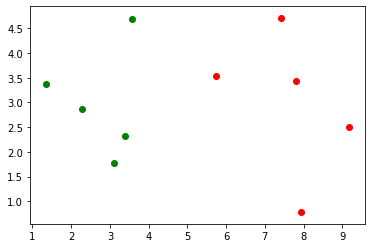

In [10]:
plt.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], color="g")
plt.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], color="r")
plt.show()

In [11]:
x = np.array([8.093607318, 3.365731514])

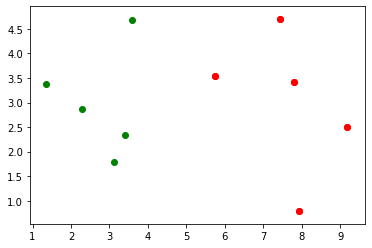

In [12]:
plt.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], color="g")
plt.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], color="r")
plt.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], color="r")
plt.show()

## kNN的过程

In [13]:
distances = []
for x_train in X_train:
    d = np.sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)

In [14]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [15]:
distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

In [16]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [17]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [18]:
nearest = np.argsort(distances)
k = 6

In [19]:
topK_y = [Y_train[i] for i in nearest[:k]]

In [20]:
topK_y

[1, 1, 1, 1, 1, 0]

In [21]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [22]:
votes = Counter(topK_y)
votes.most_common(1)        # 票数最对的n个元素

[(1, 5)]

In [23]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

## kNN算法python函数封装调用

In [24]:
%run functions/kNN.py

<Figure size 432x288 with 0 Axes>

In [25]:
predict_y = kNN_classify(6, X_train, Y_train, x)
predict_y

1

## 使用scikit-learn中kNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [28]:
help(kNN_classifier.fit)

Help on method fit in module sklearn.neighbors.base:

fit(X, y) method of sklearn.neighbors.classification.KNeighborsClassifier instance
    Fit the model using X as training data and y as target values
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree}
        Training data. If array or matrix, shape [n_samples, n_features],
        or [n_samples, n_samples] if metric='precomputed'.
    
    y : {array-like, sparse matrix}
        Target values of shape = [n_samples] or [n_samples, n_outputs]



In [29]:
kNN_classifier.fit(X_train, Y_train)    # 拟合训练数据模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [31]:
x

array([8.09360732, 3.36573151])

In [33]:
X_predict = x.reshape(1, -1)
X_predict

array([[8.09360732, 3.36573151]])

In [37]:
kNN_classifier.predict(X_predict)

array([1])

## 重新整理kNN封装代码

In [38]:
%run functions/kNNClassifier.py

In [42]:
knn_clf = KNNClassifier(k=6)

In [43]:
knn_clf.fit(X_train, Y_train)

In [45]:
Y_predict = knn_clf.predict(X_predict)   # 预测
Y_predict

array([1])